# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;

---

## Important Dates

- Homework release: Fri 12 Nov 2021
- **Homework due**: Fri 26 Nov 2021, 23:59
- Grade release: Fri 03 Dec 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

Congratulations! You have just been hired as a data scientist at *Piccardi Music,* a promising new music label created by a mysterious Italian disc jockey "*Signor Piccardi*". The company hired you to carry out a variety of data-related tasks, which will be explained in further detail below.

---

## The data

For this homework you will use a dataset of 18,403 music reviews scraped from Pitchfork¹, including relevant metadata such as review author, review date, record release year, review score, and genre, along with the respective album's audio features pulled from Spotify's API. The data consists of the following columns:

| Column   | Description  |
|----------|:-------------|
| `artist`           | The name of the artist who created the album being reviewed. |
| `album`            | The name of the album being reviewed. |
| `recordlabel`      | The name of the record label(s) who published the album. |
| `releaseyear`      | The year that the album was released. |
| `score`            | The score given to the album by the reviewer on a scale of 0.0 to 10.0. |
| `reviewauthor`     | The name of the author who reviewed the album. |
| `genre`            | The genre assigned to the album by Pitchfork. |
| `reviewdate`       | The date that the review was published.  |
| `key` | The estimated overall musical key of the track. Integers map to pitches using standard Pitch Class notation (e.g., 0 = C, 2 = D, and so on) |
| `acousticness` | A confidence measure from 0.0 to 1.0 of whether an album is acoustic. 1.0 represents high confidencethat the album is acoustic. |
| `danceability` | How suitable an album is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 1.0 is most danceable.
| `energy` | A perceptual measure of intensity and activity, from 0.0 to 1.0, where 1.0 represents high energy. Metal is often high energy. |
| `instrumentalness` | Predicts whether an album contains no vocals, from 0.0 to 1.0. The closer to 1.0, the more likely the album contains no vocals. |
| `liveness` | Detects the presence of an audience, from 0.0 to 1.0. Scores greater than 0.8 indicate a strong likelihood the album is live. |
| `loudness` | The overall loudness of the album in decibels (dB). |
| `speechiness` | Measures the presence of spoken words in an album on a scale from 0.0 to 1.0. Scores higher than 0.66 indicate an album made entirely of spoken words, while scores below 0.33 indicate music and other non-speech-like elements. |
| `valence` | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by an album, where values closer to 1.0 indicate more positive sounds. |
| `tempo` | The overall estimated tempo of an album in beats per minute (BPM). |

¹Pinter, Anthony T., et al. "P4KxSpotify: A Dataset of Pitchfork Music Reviews and Spotify Musical Features." Proceedings of the International AAAI Conference on Web and Social Media. Vol. 14. 2020.

In [1]:
# CHANGE THIS IF YOU NEED/WANT TOO

# pandas / numpy
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
# datetime operations
from datetime import datetime

# ttest and euclidean distance
from scipy.stats import ttest_ind
from scipy.spatial.distance import seuclidean
import scipy.stats as st

# linear fit using statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# good ole sklearn
from sklearn.metrics import euclidean_distances, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# displaying markdown strings
from IPython.display import display, Markdown, Latex
import warnings
warnings.filterwarnings("ignore")

## Part 1: Will this album be a hit?

The first project you embark on in your new job is to build a regressor to predict whether an album will be well received or not. According to *Signor Piccardi* (your boss), this algorithm may eventually be helpful in forecasting the success of albums produced by *Piccardi Music*.

**Task 1 (Initial analyses — 10 pts)**

As a good data scientist, the first thing you do is to have a good look at the data that was handed to you.

1. Load the data using `pandas`. Identify and remove duplicate reviews, i.e., two reviews with albums by the same band with the same name (keep the first occurrence). Print the number of rows in your dataframe.

2. Plot the distribution of album release years and the average score of albums per year.

3. For numerical columns, calculate the mean, median, minimum value and maximum value. Additionally, plot the distribution for all the numerical columns in a single image (possibly with multiple subplots). Your image should be at most 14 inches wide by 14 inches long.

3. For categorical columns, list how many different values there are in each column. If there are less than 10 distinct values for a category, print them all. For the `genre` column, assign the value `'Other'` for albums where the value is either `'none'` or `NaN`.

5. **Discuss:** This dataset was built with *found data*—i.e., the Pitchfork reviews were not made with the goal of training a machine learning model. Grounded on the previous analyses and in Pitchfork's [Wikipedia page](https://en.wikipedia.org/wiki/Pitchfork_(website)), point **three** (exactly!) ways in which this data may not be representative of music albums in general due to the way the data was collected. 

---

#### Question 1

In [3]:
df = pd.read_csv("pitchfork.csv.gz")
df = df.drop_duplicates(subset=['artist', 'album'], keep='first')# remove duplicate reviews for the combine of artist and album
df = df.reset_index()
df= df.drop('index', 1)
print(df.shape[0])

16738


In [4]:
df

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16733,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019.0,May 24 2019,none,Electronic,0.536750,0.652050,5.350000,-8.583750,0.134820,0.215916,0.519892,0.192075,0.353705,124.988200
16734,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019.0,May 24 2019,none,Rap,0.815429,0.556929,4.785714,-6.327643,0.259721,0.186476,0.000848,0.244586,0.361850,115.455857
16735,Mavis Staples,We Get By,Stephen M. Deusner,7.5,2019.0,May 24 2019,none,Pop/R&B,0.633636,0.374664,5.454545,-10.363000,0.071664,0.710727,0.001982,0.118609,0.619364,114.246818
16736,Amyl and the Sniffers,Amyl and the Sniffers,Stephen Thomas Erlewine,7.2,2019.0,May 24 2019,none,Rock,0.440909,0.876636,5.454545,-3.353182,0.064000,0.000838,0.135113,0.172718,0.591545,119.177454


#### Question 2

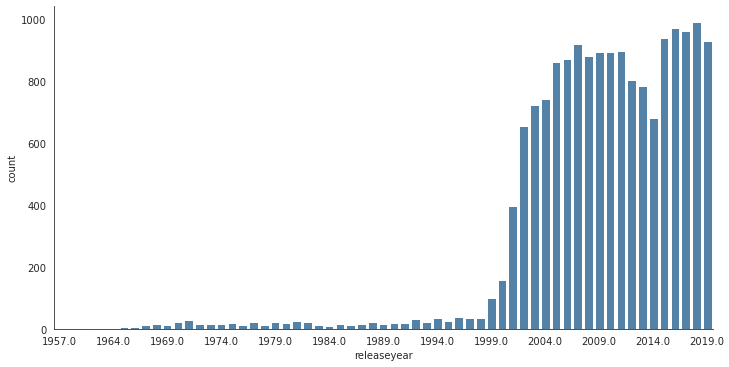

In [8]:
with sns.axes_style('white'):
    g = sns.factorplot("releaseyear", data=df, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

Text(0, 0.5, 'average score by year')

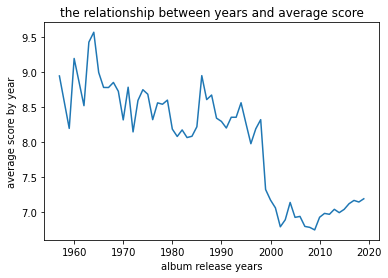

In [9]:
average_score_by_year = df[['releaseyear', 'score']].groupby('releaseyear').mean()
plt.plot(average_score_by_year.index, average_score_by_year['score'])
plt.title("the relationship between years and average score")
plt.xlabel("album release years")
plt.ylabel("average score by year")

#### Question 3

In [10]:
df.dtypes.value_counts() # check the value type for all the columns, we find the only nunmerical type is float64

float64    12
object      6
dtype: int64

In [11]:
float_data = df.select_dtypes(include=['float64']) 
x = float_data.columns
y = np.zeros((len(x),4))# 4 columns in y each stores mean, median, minimum value and maximum value 
for index, i in enumerate(x):
    y[index,0] = float_data[i].mean()
    y[index,1] = float_data[i].median()
    y[index,2] = float_data[i].min()
    y[index,3] = float_data[i].max()
df_caculate = pd.DataFrame(data=y, index=x, columns=['mean', 'median', 'min', 'max'])
df_caculate

,mean,median,min,max
score,7.048596,7.300000,0.00000,10.000
releaseyear,2009.346338,2010.000000,1957.00000,2019.000
danceability,0.512334,0.511348,-1.00000,0.974
energy,0.601276,0.624722,-1.00000,0.999
key,5.216501,5.230769,-1.00000,11.000
loudness,-9.283268,-8.444263,-51.72875,4.078
speechiness,0.090742,0.056665,-1.00000,0.958
acousticness,0.301914,0.228844,-1.00000,0.996
instrumentalness,0.274748,0.149363,-1.00000,0.982
liveness,0.196402,0.174261,-1.00000,0.978


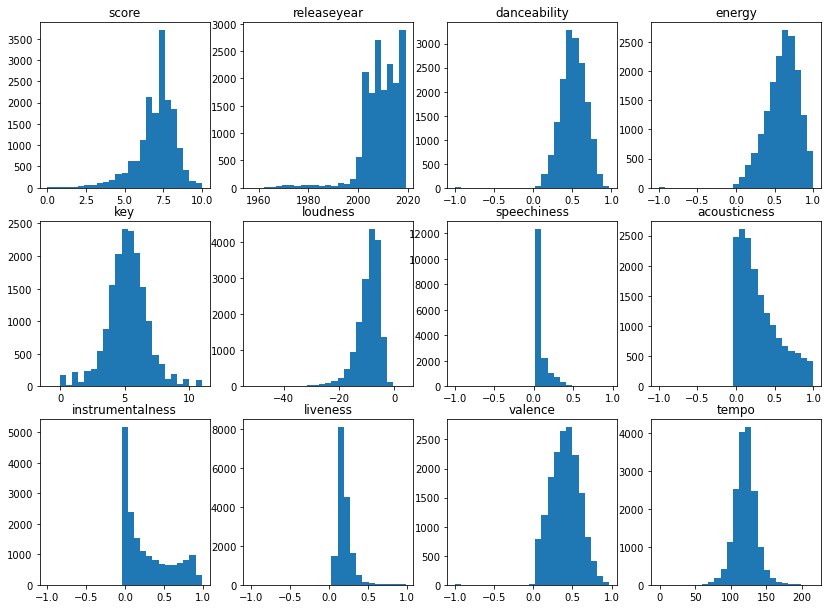

In [16]:
plt.figure(figsize=(14, 14))
for index, i in enumerate(x):
    data = float_data[i]
    plt.subplot(4,4,index+1)
    plt.hist(data,bins=25)
    plt.title(i)    

#### Question 4

In [17]:
object_data = df.select_dtypes(include=['object']) #  select categorical columns, list how many different values there are in each column
x = object_data.columns
for i in x:
    print("the number of distinct values in {0} is {1}".format(i,len(object_data[i].unique())))
    if len(object_data[i].unique()) <= 10:
        print("the distinct values in {0} is {1} ".format(i,object_data[i].unique()))  

the number of distinct values in artist is 7892
the number of distinct values in album is 16183
the number of distinct values in reviewauthor is 554
the number of distinct values in reviewdate is 4876
the number of distinct values in recordlabel is 3032
the number of distinct values in genre is 10
the distinct values in genre is ['Electronic' 'Folk/Country' 'Rock' 'Rap' 'Global' 'Experimental' 'Metal'
 'Pop/R&B' 'Jazz' 'none'] 


In [18]:
df['genre'].loc[df['genre'] == 'none'] = 'other'
df['genre'].unique()

array(['Electronic', 'Folk/Country', 'Rock', 'Rap', 'Global',
       'Experimental', 'Metal', 'Pop/R&B', 'Jazz', 'other'], dtype=object)

#### Question 5

In [19]:
# The following are 3 sentence extract from the wiki
# discuss

1 - In the 2000s the website's journalism favored independent music, favoring lo-fi and often obscure indie rock and giving only cursory treatment to other genres

2 - Pitchfork's reviews can have a significant influence on an album's popularity, especially if it had only been available to a limited audience or had been released on an independent record label.

3 - an endorsement from Pitchfork—which dispenses its approval one-tenth of a point at a time, up to a maximum of 10 points—is very valuable, indeed.

#### **Task 2 (Pre-processing and pipeline code — 12 pts)**

Next, you decide to prepare the code that will help you in training your machine learning models. Also, you implement a simple baseline. For this task, **unless otherwise stated** you must implement functions yourself, instead of relying on `scikit-learn` (you can use `numpy` or `pandas`, though!).

1. For each possible value in the `genre` column, create a new column called `{genre}_onehot` (e.g., for `genre=jazz`, create `jazz_onehot`). Collectively, these new columns should "one hot-encode" the genre column—for instance, if for a given album the `genre` is filled with the value `jazz`, the `jazz_onehot` column should equal 1 and all other `{genre}_onehot` columns should equal 0. 

2. Create a function `numpy_helper(df, cols)` to obtain a `numpy.array` out of your `dataframe`. The function should receive a dataframe `df` with N rows and a list of M columns `cols`, and should return a `np.array` of dimension (NxM).

3. For each album, build an array of features `X` containing all genre-related one-hot features, and an array of outcomes `y` containing scores. Using the function [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `random_state=123`, split the data into a train set containing 70% of all data, and a test set containing the remaining 30%.

4. Create your own baseline regressor. Using the training data (in the training stage), your regressor should estimate the average score for all albums. Then, for the test data (in the prediction stage), your classifier should always output the average score (computed on the training data).

5. Calculate the [coefficient of determination ($R^2$)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) of your baseline on the test data. **You are allowed to use the `sklearn` implementation here.**

6. **Discuss:** Your train-test split randomly selected 70% of all data for the training set. Why is this a problem for the broader task of predicting whether a future album will be successful or not?

---

#### Quesiton 1

In [49]:
df_onehot = pd.get_dummies(df, columns=['genre'],prefix="onehot") # I do no know how to creat {genre}_onehot but onehot_genre

# rename onehot_{genre} => {genre}_onehot
rename_list = []
for i, e in enumerate(df_onehot.columns[-10:]):
    rename = e[7:] + "_onehot"
    rename_list.append(rename)
df_onehot = df_onehot.rename(columns=dict(zip(df_onehot.columns[-10:].values, rename_list)))

In [50]:
df_onehot # one_hot

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,...,Electronic_onehot,Experimental_onehot,Folk/Country_onehot,Global_onehot,Jazz_onehot,Metal_onehot,Pop/R&B_onehot,Rap_onehot,Rock_onehot,other_onehot
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,0.511917,0.499667,5.250000,...,1,0,0,0,0,0,0,0,0,0
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,0.369765,0.325412,4.470588,...,0,0,1,0,0,0,0,0,0,0
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,0.253943,0.912857,4.428571,...,1,0,0,0,0,0,0,0,0,0
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,0.425400,0.433474,5.700000,...,0,0,0,0,0,0,0,0,1,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,0.624846,0.438154,4.153846,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16733,Flying Lotus,Flamagra,Philip Sherburne,7.8,2019.0,May 24 2019,none,0.536750,0.652050,5.350000,...,1,0,0,0,0,0,0,0,0,0
16734,YG,4REAL 4REAL,Sheldon Pearce,7.2,2019.0,May 24 2019,none,0.815429,0.556929,4.785714,...,0,0,0,0,0,0,0,1,0,0
16735,Mavis Staples,We Get By,Stephen M. Deusner,7.5,2019.0,May 24 2019,none,0.633636,0.374664,5.454545,...,0,0,0,0,0,0,1,0,0,0
16736,Amyl and the Sniffers,Amyl and the Sniffers,Stephen Thomas Erlewine,7.2,2019.0,May 24 2019,none,0.440909,0.876636,5.454545,...,0,0,0,0,0,0,0,0,1,0


#### Question 2

In [51]:
def numpy_helper(df, cols):
    df = df[cols]
    return df.to_numpy()

# test if it works
numpy_helper(df_onehot, ['album', 'artist'])

array([['Studio 1', 'Studio 1'],
       ['The Great Santa Barbara Oil Slick', 'John Fahey'],
       ['Too Much Guitar', 'Reigning Sound'],
       ...,
       ['We Get By', 'Mavis Staples'],
       ['Amyl and the Sniffers', 'Amyl and the Sniffers'],
       ['STFU II EP', 'D√¢m-Funk']], dtype=object)

#### Question 3

In [52]:
X = numpy_helper(df_onehot, df_onehot.columns[-10:])
y = numpy_helper(df_onehot, 'score')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

#### Question 4

In [25]:
"""First we need to define the regression method function"""
def standlization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    sigma[sigma == 0] = 1
    return (data - mu) / sigma

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    err = y - tx.dot(w)
    grad = -tx.T.dot(err) / len(err)
    return grad

def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = initial_w
    for n_iter in range(max_iters):
        # compute loss, gradient
        grad = compute_gradient(y, tx, w)
        # update w by gradient descent
        w = w - gamma * grad
    return  w

def  average_score_estimation(tx, w):
    """return the estimated everage score"""
    return tx.dot(w)

In [26]:
"""Then we apply the model to the X_train set to predict the test set"""
# Initialization
w_initial = np.random.rand((X_train.shape[1]))
max_iters = 5000
gamma = 0.3
w = gradient_descent(y_train, X_train, w_initial, max_iters, gamma)
y_train_estimate = average_score_estimation(X_train, w)
y_test_estimate = average_score_estimation(X_test, w)
print(y_train_estimate)
print(y_test_estimate)

[6.99635662 7.2151751  7.37448338 ... 6.99635662 6.94523532 6.94523532]
[6.98459016 6.99635662 7.37448338 ... 6.94523532 7.2151751  7.37448338]


#### Question 5

In [27]:
z = r2_score(y_test, y_test_estimate)
z

0.013786458484265296

#### Question 6

Because the data is a sample of all the datas, even it select 70% of training set, it still has bias.And the genre is not enough to predict the future score.

**Task 3 (Regression — 14 pts)**

Finally, you get down to business and train your regression models.

1. Build a Linear Regression model (use `sklearn`) that predicts the outcome `score` using the features "releaseyear",  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", "tempo" and the one-hot encoded genre-related columns.  Using a 70/30 train-test split similar to what you did in task two (hereinafter referred to as "the random split", use the same random seed, `random_state=123`), report the $R^2$ for the testing set.

2. Create an alternate train-test split (hereinafter referred to as "the longitudinal split") where you train with data from albums released before 2000 and test with data from 2003 and after. Report the $R^2$ for the testing set using the same model you developed for the previous question. **Discuss:** give the correct interpretation of $R^2$ value for the longitudinal split.

3. For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Considering the model trained in 3.2, plot the distribution of your residuals for the test set. Additionally, estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.

4. Experiment with training a different regressor, a Gradient Boosting Regressor. This regressor is related to the Boosted decision trees that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on Kaggle). Train the regressor using the longitudinal split and the same features as in 3.2, use the default hyperparameters. Report the $R^2$ for the testing set. 

5. **Discuss:** Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

---

#### Question 1

In [28]:
feature_names = df_onehot.columns[7:].values.tolist()
feature_names.append('releaseyear')

X = numpy_helper(df_onehot, feature_names)
y = numpy_helper(df_onehot, 'score')

X = standlization(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
z = r2_score(y_test, y_predict)
print(z)

0.044194953949232785


#### Question 2 + discuss

In [29]:
df1 = df_onehot[df_onehot['releaseyear'] < 2000] 
df2 = df_onehot[df_onehot['releaseyear'] >= 2003]

X_train = numpy_helper(df1, feature_names) # train with data from albums released before 2000
y_train = numpy_helper(df1, 'score')
X_test = numpy_helper(df2, feature_names) # test with data from albums released after 2003$
y_test = numpy_helper(df2, 'score')
#X_train = standlization(X_train)
#X_test = standlization(X_test)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
z = r2_score(y_test, y_predict)
print(z)

-0.28321511717102466


In [30]:
### discuss

#### Question 3

In [31]:
res = y_test - y_predict

Text(0.5, 1.0, 'distribution of residuals for the test set.')

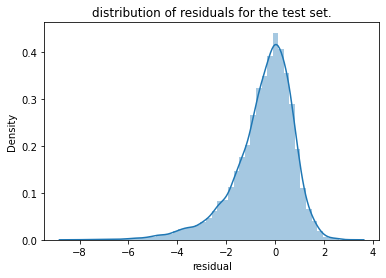

In [32]:
ax = sns.distplot(res, hist=True)
plt.xlabel("residual")
plt.title("distribution of residuals for the test set.")

In [33]:
# estimate what is the probability that your score prediction (from 3.2) is off by more than 2-points
print("The propability is {}".format(np.sum(res < -2)/len(res)+np.sum(res > 2)/len(res)))

The propability is 0.10940889370932755


In [34]:
#create 95% confidence interval for residuals  for the test set
print("we have 95% confidence that the mean of res lies between : ")
st.t.interval(alpha=0.95, df=len(res)-1, loc=np.mean(res), scale=st.sem(res))

we have 95% confidence that the mean of res lies between : 


(-0.5012657598216989, -0.46123632084700616)

#### Question 4

In [35]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
print("The R2 score is ", reg.score(X_test, y_test))

The R2 score is  -0.4107430855276646


#### Question 5 

In [36]:
### discuss- Hypothesize a reason for the difference in performance between the Linear regression and the Gradient Boosting Regressor.

**Task 4 (Are we solving the correct problem? — 16 pts)**

All your efforts so far have assumed that decisions are taken at the "album" level, which is often not the case for bands with multiple albums. In those cases, it could be interesting to predict what is the success of a given band album given the features of the album **and of previous albums**.

1. Create a new dataframe that contains one row per band with more than 1 album. This dataframe should have the same columns as the data provided to you, considering the latest album of the respective band (note that this is determined by the release year of the album, not the date when it was reviewed). Additionally, for each feature considered in Task 3.1 (including the one-hot encoded features), create an additional column post-fixed with `_previous` (e.g., `danceability_previous`). These columns should contain the average values for all of the band's previous albums. Also, create a column `score_previous` with the average score of previous albums. Print the number of rows in the dataframe as well as the name of the columns.

2. Train a Gradient Boosting Regressor considering all features created in Task 4.1 (note that `score` is the outcome and everything else is a feature, including `score_previous`). Use the 70/30 random train-test split, the default hyperparameters, and report the $R^2$ for the testing set. 

3. Can hyperparameter tuning improve your model? Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation. Experiment tuning two hyperparameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`. For each possible combination of the two hyperparameters (see below for the range of values that you should try for each hyperparameter), train your model in a cross-validation setup with $N=20$ folds. Report the mean  $R^2$ along with the 90% CI for each scenario. 
    - n_estimators $ \in  \{ 100, 200, 300, 400\}$
    - learning_rate $ \in  \{ 0.1, 0.05, 0.01\}$.
 
 With the best hyperparameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
 
4. **Discuss:** How do these results compare with the previous setup (the scenario considered in **Task 3.4**)? Point out two reasons why it is hard to compare the results obtained in 4.3 and 3.4 at face value? How would you fairly compare the two different setups?

---

#### Question 1

In [58]:
# create the names of the news columns
columns = df_onehot.columns.values[7:].tolist()
columns.append('score')
new_columns = np.array(columns, dtype=object) + '_previous'

# compute the features mean of the previous albums
df_onehot[new_columns] = df_onehot.sort_values('releaseyear').groupby('artist')[columns] \
.transform(lambda x: x[:-1].mean() if len(x) > 1 else None)

In [60]:
# Keep only the artists with more than one album and keep only their last album
new_df = df_onehot.sort_values('releaseyear').groupby('artist').filter(lambda x: len(x)  > 1).groupby('artist').tail(1)
new_df

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,danceability,energy,key,...,Experimental_onehot_previous,Folk/Country_onehot_previous,Global_onehot_previous,Jazz_onehot_previous,Metal_onehot_previous,Pop/R&B_onehot_previous,Rap_onehot_previous,Rock_onehot_previous,other_onehot_previous,score_previous
7858,Ornette Coleman,Ornette!,Alex Linhardt,8.8,1962.0,March 11 2004,Atlantic,0.523800,0.356200,6.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.400000
11485,Harry Nilsson,Son of Schmilsson,Dominique Leone,6.5,1972.0,June 9 2006,RCA,0.557000,0.457155,5.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.400000
9904,T. Rex,Tanx,Stephen M. Deusner,8.3,1973.0,February 5 2006,Wizard,0.472769,0.754692,6.538462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.650000
208,Michael Yonkers,Grimwood,Andrew Gaerig,6.2,1974.0,October 22 2007,Self-released,0.430333,0.311250,6.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.150000
15226,Flamin' Groovies,Shake Some Action,Joe Tangari,8.5,1976.0,September 5 2005,Sire,0.439357,0.734071,4.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,Aretha Franklin,Songs of Faith: Aretha Gospel,Caryn Rose,8.0,2019.0,March 25 2019,Geffen,0.358778,0.325333,4.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.000000
8355,The Mountain Goats,In League With Dragons,Arielle Gordon,7.4,2019.0,April 30 2019,Merge,0.608000,0.461167,6.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.764286
8944,Boogie,Everything’s for Sale,Trey Alston,7.1,2019.0,January 31 2019,Shady,0.472500,0.829500,5.900000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.500000
13845,DaBaby,Baby On Baby,Paul A. Thompson,7.7,2019.0,March 8 2019,Interscope,0.826769,0.700769,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.600000


In [61]:
print('Number of rows:', len(new_df))
print('Columns name:', new_df.columns.values)

Number of rows: 3564
Columns name: ['artist' 'album' 'reviewauthor' 'score' 'releaseyear' 'reviewdate'
 'recordlabel' 'danceability' 'energy' 'key' 'loudness' 'speechiness'
 'acousticness' 'instrumentalness' 'liveness' 'valence' 'tempo'
 'Electronic_onehot' 'Experimental_onehot' 'Folk/Country_onehot'
 'Global_onehot' 'Jazz_onehot' 'Metal_onehot' 'Pop/R&B_onehot'
 'Rap_onehot' 'Rock_onehot' 'other_onehot' 'danceability_previous'
 'energy_previous' 'key_previous' 'loudness_previous'
 'speechiness_previous' 'acousticness_previous'
 'instrumentalness_previous' 'liveness_previous' 'valence_previous'
 'tempo_previous' 'Electronic_onehot_previous'
 'Experimental_onehot_previous' 'Folk/Country_onehot_previous'
 'Global_onehot_previous' 'Jazz_onehot_previous' 'Metal_onehot_previous'
 'Pop/R&B_onehot_previous' 'Rap_onehot_previous' 'Rock_onehot_previous'
 'other_onehot_previous' 'score_previous']


#### Question 2

In [62]:
# select the features columns
features_name = new_df.columns[7:].values.tolist()
features_name.append('releaseyear')

X = numpy_helper(new_df, features_name)
y = numpy_helper(new_df, ['score'])
X = standlization(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [63]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
print("The R2 score is ",reg.score(X_test, y_test))

The R2 score is  0.21584949573955214


#### Question 3

In [42]:
def cross_validation(X, y, n, model):
    """
    Compute the cross-validation of the model and return the averaged R2 score
    
    Input:
    - X: Input data features
    - y: Data labels
    - n: Number of folds
    - model: the model we want to apply the cross-validation (GradientBoostingRegressor, ...)
    
    Output:
    - The mean of the n R2 scores
    """
    
    R2_score = []    
    kf = sklearn.model_selection.KFold(n_splits=n, random_state=0)
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_val)
        
        R2_sc = model.score(X_val, y_val)
        R2_score.append(R2_sc)
        
    return sum(R2_score)/n

In [43]:
n = 20
n_est = [100, 200, 300, 400]
lr = [0.1, 0.05, 0.01]

# Compute the cross-validation for all the different values of the parameters n_estimators and learning_rate
score = []
for i in range(len(n_est)):
    for j in range(len(lr)):
        reg = GradientBoostingRegressor(random_state=0, n_estimators=n_est[i], learning_rate=lr[j])
        score.append(cross_validation(X_train, y_train, n, reg))

print('The R2 scores is', score)

KeyboardInterrupt: 

In [ ]:
# (TO DO) compute the 90% CI for each scenario

#st.t.interval(alpha=0.90, df=len(x)-1, loc=np.mean(x), scale=st.sem(x))

In [ ]:
# get the indices of the best hyperparameters
ind_max = np.argmax(np.array(score)) 
i, j = ind_max // 4 , ind_max % 3

In [ ]:
# Train with the entire training set using the best hyperparameters and test it on the test set
reg = GradientBoostingRegressor(random_state=0, n_estimators=n_est[i], learning_rate=lr[j])
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)
print("The R2 score is ", reg.score(X_test, y_test))

#### Question 4 (Discuss)

## Part 2: Second Album Syndrome

Your second project at *Piccardi Music* is to shed light on one of the business's oldest enigmas: the "second album syndrome." In a nutshell, the "second album syndrome" is a theory that states that the second album of a band always sucks. ([Related read](https://tvtropes.org/pmwiki/pmwiki.php/Main/SophomoreSlump))

Assume—for the purpose of this task—that the Pitchfork data contains all albums for all artists it covers (even though this might not be true in reality).

**Task 5 (Preliminary analyses — 8 pts)**

You begin by carrying out some preliminary data processing and analyses.

1. Create a new dataframe (from the original data with duplicates dropped, the same as you obtained after finishing Task 1.1) containing only albums from artists with two or more albums and where the release year is not empty.
2. Create a new column `album_number` which indicates how many albums the artist has produced before this one (before the second album, the artist has already produced one album).
3. Calculate the mean and the standard error fo the mean of the scores of the first and second albums in the dataset. Additionally, plot the two distributions. 
4. Use an appropriate method to determine if the difference in means of 1st and 2nd albums is statistically significant?
5. **Discuss:** Do these analyses suggest that the "second album syndrome" exists?

---

#### Question 1

In [65]:
df = pd.read_csv("data/pitchfork.csv.gz")
df = df.drop_duplicates(subset=['artist', 'album'], keep='first')# remove duplicate reviews for the combine of artist and album
df = df.reset_index()
df= df.drop('index', 1)
print(df.shape[0])
df = df.groupby('artist').filter(lambda x: len(x) > 1)
print(df.shape[0])


16738
12410


In [66]:
df['releaseyear'].isnull().values.any() # => no empty values for releaseyear

False

#### Question 2

In [67]:
df['album_number'] = df.sort_values('releaseyear').groupby('artist')['releaseyear'].cumcount()

In [74]:
df.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,album_number
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,2
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,0
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,4
5,French Kicks,Swimming,Roque Strew,7.6,2008.0,August 27 2008,Vagrant,Electronic,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,3
6,Jessica Lea Mayfield,With Blasphemy So Heartfelt,Stephen M. Deusner,8.2,2008.0,November 11 2008,Polymer,Rock,0.447583,0.399083,6.500000,-8.402000,0.032267,0.694750,0.004033,0.123142,0.237933,111.549917,0


#### Question 3

In [78]:
score_first_album = df[df['album_number'] == 0]['score']
score_second_album = df[df['album_number'] == 1]['score']

mean_first_album = score_first_album.mean()
mean_second_album = score_second_album.mean()
std_first_album = score_first_album.std()
std_second_album = score_second_album.std()

print('First album mean:', mean_first_album)
print('Second album mean:', mean_second_album)
print('First album std:', std_first_album)
print('Second album std:', std_second_album)

First album mean: 7.299579124579116
Second album mean: 7.041722783389435
First album std: 1.2361939643330664
Second album std: 1.2716059558760142


Text(0.5, 1.0, 'score density for the second album')

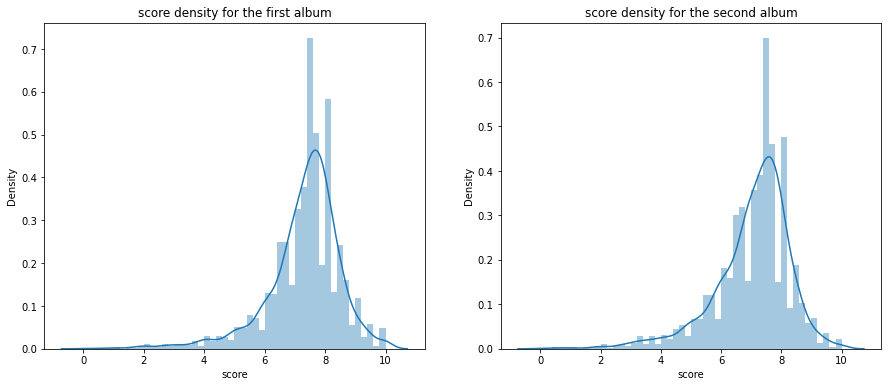

In [79]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(score_first_album)
plt.title('score density for the first album')
plt.subplot(1, 2, 2)
sns.distplot(score_second_album)
plt.title('score density for the second album')

#### Question 4

In [80]:
# H0: the mean of the first album is equal to the mean of the second album
stat, p = ttest_ind(score_first_album, score_second_album)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('fail to reject H0')
else:
    print('reject H0')

Statistics=8.680115088839761, p=4.843510495812017e-18
reject H0


#### Question 5 (Discuss)
Yes, because the null hypothesis (score mean of the first album is equal to the score mean of the second album) has been rejected. So it means we don't have the same distribution. Moreover, the score mean of the first album is greater than the score mean of the second album.

**Task 6 (Regression analysis — 20 pts)**

Next, you proceed to examine some hypotheses about the "second album syndrome" using a regression framework. Namely:

- The **time spent hypothesis:**  the first album usually has a couple of years of development under its belt and plenty of trial and error from live concerts to help the band determine what does or doesn't work. The second album, on the other hand, is often made in a rush.

- The **style change hypothesis:** bands often try to change their style after their first album. This change is not always welcomed by the listeners.

1. Create a new dataframe containing one row per 1st-2nd album pair. The dataframe should contain rows:
    - `score_diff`: the difference in scores between the second and the first album (second - first).
    - `time_diff`: the number of days elapsed between the first and the second album.
    - `did_style_change`: a dummy variable that indicates whether the style of the music has changed. To obtain it, first, calculate the [standardized euclidean distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.seuclidean.html) of music-related numerical features¹ between the second and the first album. Second, assign 1 to the 20% most distant 1st-2nd album pairs and 0 to all others.
2. Fit a linear regression using `statsmodels` with this dataframe. Your regression should consider only an intercept, i.e., `"score_diff ~ 1"`.
3. **Discuss:** Interpret the $R^2$ in your regression here. Does this analysis confirm what you observed in Task 5? Why?
4. Include the `time_diff` and `did_style_change` as covariates in your model. Fit the regression again and report the summary of your model. 
5. **Discuss:** Interpret the coefficients `time_diff` and `did_style_change`. Carefully explain whether they provide evidence towards each of the aforementioned hypotheses? Do they rule out other reasons that may cause the "second album syndrome effect"?
6. Create a new column called `time_diff_standardized`. It should be a standardized version of the `time_diff` column. Repeat the regression done in 6.4 using the `time_diff_standardized` column instead of the `time_diff` column.
7. **Discuss:** Explain how the interpretation of the coefficients associated with this new column `time_diff_standardized` differ from its non-standardized version 
`time_diff`?

--- 

**¹** Music related numerical features are:  "key", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "valence", and "tempo".


#### Question 1

In [82]:
from scipy.spatial import distance

# create a dataframe with each row contain the features of the first and second album of the artist (artist is the index)
df = df[(df['album_number'] == 1) | (df['album_number'] == 0)]
first_album = df[df['album_number'] == 0]
second_album = df[df['album_number'] == 1]
album_merged = first_album.merge(second_album, on='artist')
album_merged.set_index('artist', inplace=True)

# compute the score_diff and time_diff features
score_diff = album_merged['score_y'] - album_merged['score_x']
time_diff = (album_merged['releaseyear_y'] - album_merged['releaseyear_x']) * 365

# the numerical features columns for the first and second album respectively
music_num_feat_1_name = album_merged.columns[7:17]
music_num_feat_2_name = album_merged.columns[25:35]

# compute the did_style_change feature
std_feat = np.var(df[df.columns[8:18]])
r = album_merged.apply(lambda x: distance.seuclidean(x[music_num_feat_1_name], x[music_num_feat_2_name], std_feat), axis=1)
per_80 = np.percentile(r, 80)
did_style_change = r.apply(lambda x: 1 if x > per_80 else 0)

# create the new dataframe with the three new features
diff_album = pd.concat([score_diff, time_diff, did_style_change], axis=1)
diff_album.columns = ['score_diff', 'time_diff', 'did_style_change']

In [83]:
diff_album

,score_diff,time_diff,did_style_change
artist,,,
Reigning Sound,-0.5,365.0,0
Jessica Lea Mayfield,-0.5,1095.0,1
The Essex Green,-1.9,1095.0,0
American Football,-0.5,7300.0,0
FIDLAR,-1.2,730.0,0
...,...,...,...
Bonnie ‚ÄúPrince‚Äù Billy,0.0,0.0,1
Taylor Swift,1.4,730.0,0
Cat Power,-1.9,730.0,0


#### Question 2

In [84]:
lr = smf.ols(formula='score_diff ~ 1', data=diff_album)
np.random.seed(5)
lr_res = lr.fit()
print(lr_res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Nov 2021   Prob (F-statistic):                nan
Time:                        17:45:25   Log-Likelihood:                -6202.6
No. Observations:                3564   AIC:                         1.241e+04
Df Residuals:                    3563   BIC:                         1.241e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2579      0.023    -11.161      0.0

#### Question 3 (Discuss)

The intercept is negative, so it means it is more likely to have the variable ´diff_score´ negative. And ´diff_score´ is the score of the second album minus the score of the first album, so to have ´diff_score´ negative, we need to have the score of the first album bigger than the second one.

#### Question 4

In [85]:
lr2 = smf.ols(formula='score_diff ~ time_diff + C(did_style_change)', data=diff_album)
lr2_res = lr2.fit()
print(lr2_res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.99
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.38e-15
Time:                        17:45:27   Log-Likelihood:                -6168.9
No. Observations:                3564   AIC:                         1.234e+04
Df Residuals:                    3561   BIC:                         1.236e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Question 5 (Discuss)

#### Question 6

In [86]:
diff_album['time_diff_standardized'] = (diff_album['time_diff'] - diff_album['time_diff'].mean()) / diff_album['time_diff'].std()
lr3 = smf.ols(formula='score_diff ~ time_diff_standardized + C(did_style_change)', data=diff_album)
lr3_res = lr3.fit()
print(lr3_res.summary())

                            OLS Regression Results                            
Dep. Variable:             score_diff   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     33.99
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.38e-15
Time:                        17:45:32   Log-Likelihood:                -6168.9
No. Observations:                3564   AIC:                         1.234e+04
Df Residuals:                    3561   BIC:                         1.236e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#### Question 7 (Discuss)

**Task 7 (Sanity checks — 6 pts)**

You decide to perform a few last sanity checks for your analysis.

1.  **Discuss:** If the Second Album Syndrome existed, i.e., something was special about the second album (as in if it was bad for a very particular reason that afflicted album number 2 more than all others), what would you expect to happen to the mean score of the third album?
2. Using the dataset you created in Task 5, calculate the mean and the standard error of the mean for the 1st, 2nd, 3rd, and 4th albums. Test whether the difference between the average score of the second and the third album is statistically significant.
3. **Discuss:** Does this suggest that the Second Album Syndrome exists?

---


#### Question 1 (Discuss)

#### Question 2

To make the comparison fair we only choose those artists with greater than 3 albums

In [100]:
df = pd.read_csv("data/pitchfork.csv.gz")
df = df.drop_duplicates(subset=['artist', 'album'], keep='first')# remove duplicate reviews for the combine of artist and album
df = df.reset_index()
df= df.drop('index', 1)
print(df.shape[0])
df = df.groupby('artist').filter(lambda x: len(x) > 3)
print(df.shape[0])
df['album_number'] = df.sort_values('releaseyear').groupby('artist')['releaseyear'].cumcount()

16738
6866


In [109]:
lengths = [i for i in range(4)]
mean = []
std = []
for i in range(4):
    score = df[df['album_number'] == i]['score']
    if i == 1:
        score_second_album = score
    if i == 2:
        score_third_album = score
    mean.append(score.mean())
    std.append(score.std())
    print(i+1,"th album mean", score.mean())
    print(i+1,"th album std", score.std())
    



1 th album mean 7.541511035653662
1 th album std 1.3496530629304095
2 th album mean 7.342699490662143
2 th album std 1.2999909206988642
3 th album mean 7.157640067911721
3 th album std 1.254787345490618
4 th album mean 7.050679117147707
4 th album std 1.2239275668071132


In [112]:
# H0: the mean of the second album is equal to the mean of the third album

stat, p = ttest_ind(score_second_album, score_third_album)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('fail to reject H0')
else:
    print('reject H0')

Statistics=3.515423584466184, p=0.0004473487592841554
reject H0


#### Question 3 (Discuss)

**Task 8 (Eureka — 14 pts)**

Your boss, *Signor Piccardi*, proposes that you carry out a simulation to make things clearer. Assuming that:


- Each band $i$ has a "talent" $\mu_i$ , which is uniformally distributed between 2 and 8, i.e., $\mu_i \sim U_{[2,8]}$.
- When a band $i$ produces an album $j$, it has quality $s_j$. This score is normally distributed with mean $\mu_i$ and standard deviation $1$, i.e., $s_j \sim N(\mu_i, 1)$
- Talents are independent and identically distributed random variables.
 
Carry out the following simulation:

- Create 1000 hypothetical bands with intrinsic talents $\mu_i \sim U_{[2,8]}$ for $i \in [1,1000]$.
- Have each hypothetical band create a hypothetical album.
- Discard all bands whose albums received a score smaller than 6.
- For each of the remaining bands, create two additional albums.

Analyzing the scores obtained in this simulation, provide a coherent explanation for the  scores obtained in Task 7.2. 

--- 

**Hint:** You can use numpy to sample random variables (e.g. [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html))

Multivariate gaussian with a covariance matrix as identity is equal to independent gaussians. Saves us from using an expensive for loop

In [124]:
band_means = np.random.uniform(2, 8, 1000)
cov = np.eye(len((band_means)))
album_scores = np.random.multivariate_normal(band_means, cov)

In [130]:
truth = album_scores >= 6
band_means_filter = band_means[truth]
album_scores_filter = album_scores[truth]

In [132]:
cov_filter = np.eye(len((band_means_filter)))
album_scores_second = np.random.multivariate_normal(band_means_filter, cov_filter)
album_scores_third = np.random.multivariate_normal(band_means_filter, cov_filter)

Comparison between the first albums we created and the second albums generated after filtering out the first

In [137]:
print("Mean of first album after filtering", album_scores_filter.mean())
print("Mean of second album after generating", album_scores_second.mean())
print("Std of first album after filtering", album_scores_filter.std())
print("Std of second album after generating", album_scores_second.std())

Mean of first album after filtering 7.234359326754328
Mean of second album after generatng 6.759563255498165
Std of first album after filtering 0.8332617639256851
Std of second album after generatng 1.3017149298753006


In [133]:
# H0: the mean of the first album filtered is equal to the mean of the second album created

stat, p = ttest_ind(album_scores_second, album_scores_filter)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('fail to reject H0')
else:
    print('reject H0')

Statistics=-5.6477668519694495, p=2.394999486864238e-08
reject H0


Comparison between the Second albums generated and the third albums generated after filtering out the first

In [138]:
print("Mean of second album after generating", album_scores_second.mean())
print("Mean of third album after generating", album_scores_third.mean())
print("Std of second album after generating", album_scores_second.std())
print("Std of third album after generating", album_scores_third.std())

Mean of second album after generating 6.759563255498165
Mean of third album after generating 6.838075890154044
Std of second album after generating 1.3017149298753006
Std of third album after generating 1.339511429809002


In [140]:
# H0: the mean of the first album filtered is equal to the mean of the second album created

stat, p = ttest_ind(album_scores_second, album_scores_third)
print('Statistics={}, p={}'.format(stat, p))
alpha = 0.05
if p > alpha:
    print('fail to reject H0')
else:
    print('reject H0')

Statistics=-0.7727923477401016, p=0.43991539498033083
fail to reject H0
